<a href="https://colab.research.google.com/github/Manju-Paryani/machine_learning_internship_project/blob/main/Predicting_House_Prices_in_Bengaluru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('/content/Train.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

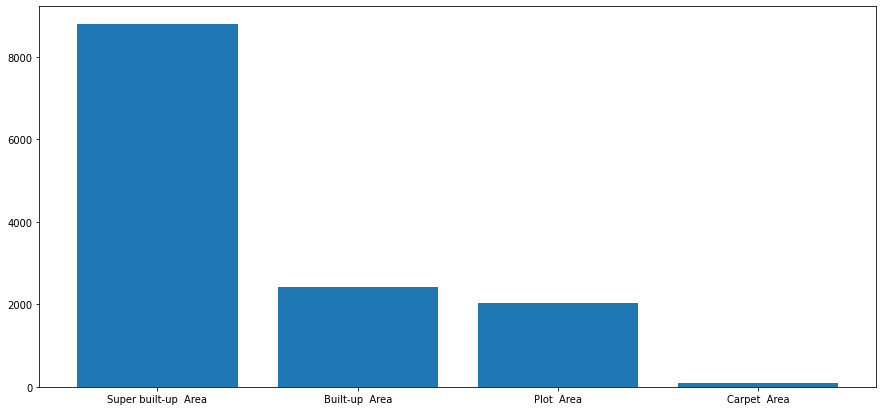

In [5]:
plt.figure(figsize=(15,7))
plt.bar(df['area_type'].value_counts().index,df['area_type'].value_counts().values)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


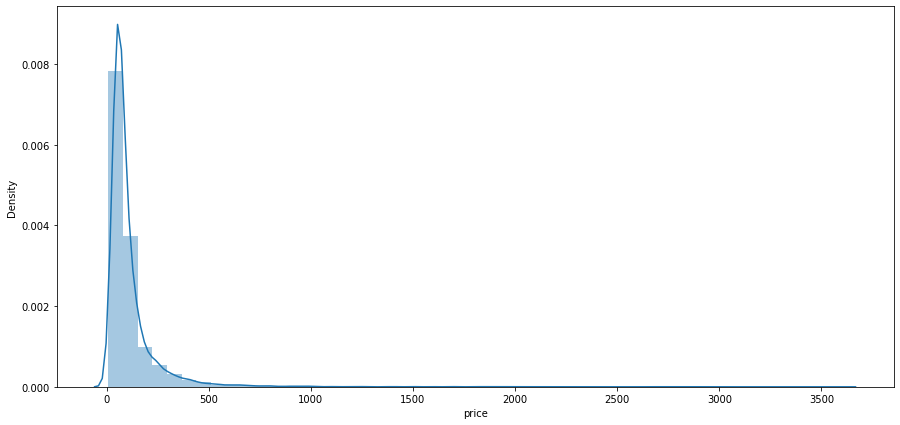

In [6]:
plt.figure(figsize=(15,7)) 
sns.distplot(df['price']) 
plt.show()

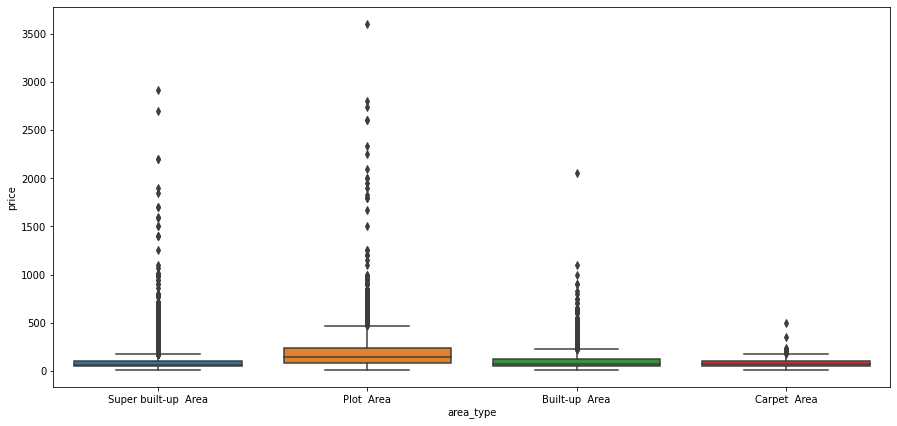

In [7]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x=df['area_type'],y=df['price'])
plt.show()

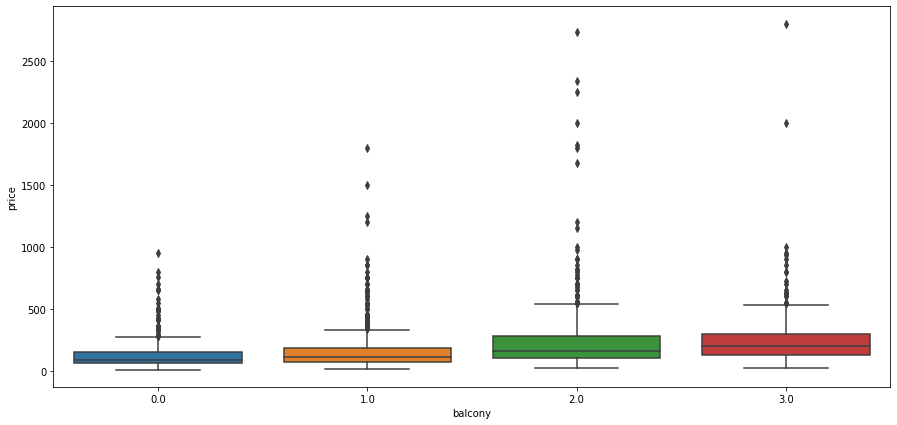

In [8]:
sub_df = df[df['area_type'] == 'Plot  Area']
plt.figure(figsize=(15,7))
sns.boxplot(data=sub_df,x=sub_df['balcony'],y=sub_df['price'])
plt.show()

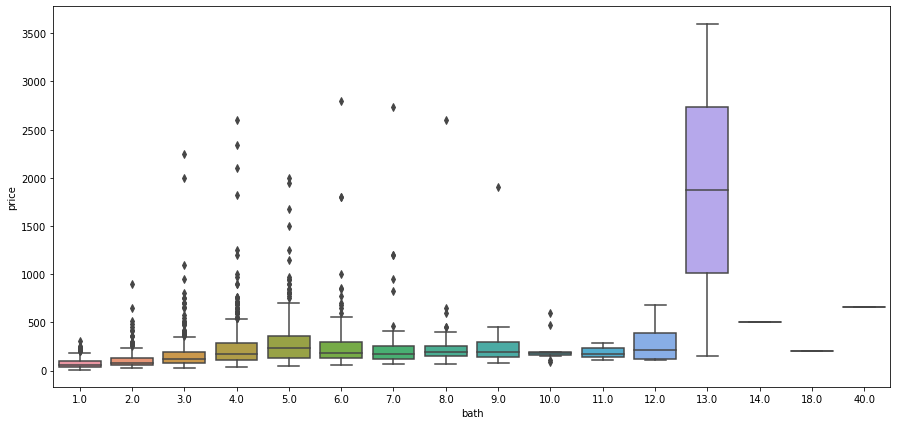

In [9]:
plt.figure(figsize=(15,7)) 
sns.boxplot(data=sub_df,x=sub_df['bath'],y=sub_df['price']) 
plt.show()

In [10]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

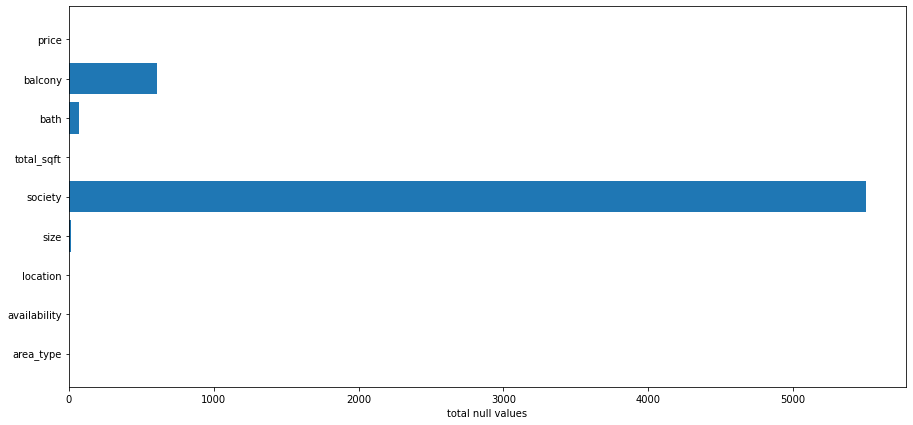

In [11]:
plt.figure(figsize=(15,7))
plt.barh(df.isnull().sum().index,width=df.isnull().sum().values)
plt.xlabel('total null values')
plt.show()

In [12]:
df['balcony'].replace({0.0:1,1.0:2,2.0:3,3.0:4},inplace=True)
df['balcony'].unique()
df.fillna(0,inplace=True)
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [13]:
df = df.drop('society', axis=1)
df['location'] = df['location'].factorize()[0]
df['size'] = df['size'].factorize()[0]
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

In [14]:
imputer = SimpleImputer(missing_values= np.NAN, strategy= 'mean', fill_value=None, verbose=0, copy=True)

In [15]:
X = df.drop('price', axis=1).values
Y = df['price'].values

In [16]:
le_X_0 = LabelEncoder()
le_X_1 = LabelEncoder()
le_X_2 = LabelEncoder()
le_X_3 = LabelEncoder()

In [17]:
X[:, 0] = le_X_0.fit_transform(X[:, 0])
X[:, 1] = le_X_1.fit_transform(X[:, 1])
X[:, 2] = le_X_2.fit_transform(X[:, 2])
X[:, 3] = le_X_3.fit_transform(X[:, 3])

In [18]:
X = imputer.fit_transform(X)

print(X[:,2])

[  0.   1.   2. ...  15. 128.  37.]


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 21)

In [20]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)
print(Y_pred)

[177.08789498  65.0425067   74.31072191 ... 235.24035685  65.46932472
  66.3012046 ]


In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print (rmse)

88.68783792549848


test


In [23]:
df2 = pd.read_csv('Test.csv')
df2 = df2.drop(['price','society'], axis=1)
print(df2.head())

              area_type   availability  ... bath balcony
0  Super built-up  Area  Ready To Move  ...  2.0     2.0
1            Plot  Area  Ready To Move  ...  9.0     2.0
2            Plot  Area         18-Apr  ...  5.0     2.0
3  Super built-up  Area  Ready To Move  ...  3.0     1.0
4  Super built-up  Area  Ready To Move  ...  2.0     1.0

[5 rows x 7 columns]


In [24]:
df2['size'] = df2['size'].factorize()[0]
df2['total_sqft'] = pd.to_numeric(df2['total_sqft'], errors='coerce')
print(df2.info())
df2 = df2.values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     1480 non-null   object 
 1   availability  1480 non-null   object 
 2   location      1480 non-null   object 
 3   size          1480 non-null   int64  
 4   total_sqft    1456 non-null   float64
 5   bath          1473 non-null   float64
 6   balcony       1411 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 81.1+ KB
None


In [25]:
le_df2_0 = LabelEncoder()
le_df2_1 = LabelEncoder()
le_df2_2 = LabelEncoder()
le_df2_3 = LabelEncoder()



In [26]:
df2[:, 0] = le_df2_0.fit_transform(df2[:, 0])
df2[:, 1] = le_df2_1.fit_transform(df2[:, 1])
df2[:, 2] = le_df2_2.fit_transform(df2[:, 2])
df2[:, 3] = le_df2_3.fit_transform(df2[:, 3])


In [27]:
df2 = imputer.fit_transform(df2)

In [28]:
predictions = regressor.predict(df2)
print(predictions)



[ 73.29848745 333.93743592 185.50229362 ...  73.16296503  72.87768212
  62.40935068]


In [29]:
df3 = pd.DataFrame()
df3['price'] = predictions
print(df3.head())

        price
0   73.298487
1  333.937436
2  185.502294
3  122.611010
4   81.383271


In [30]:
df3.to_excel('Submitted.xlsx', index= False)